In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [31]:
#Data Preparation
heart_df=pd.read_csv("E://KVK_DATA--2.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,prevalentHyp,diabetes,sysBP,diaBP,RR_Interval,heartRate,Outcomes
0,1,39,0,0.0,0,0,106.0,70.0,1000,80,0
1,0,46,0,0.0,0,0,121.0,81.0,987,95,0
2,1,48,1,20.0,0,0,127.5,80.0,900,75,0
3,1,61,1,30.0,1,0,150.0,95.0,1000,65,1
4,0,46,1,23.0,0,0,130.0,84.0,100,85,0


In [32]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

In [33]:
#Missing values
heart_df.isnull().sum()

Sex_male         0
age              0
currentSmoker    0
cigsPerDay       2
prevalentHyp     0
diabetes         0
sysBP            0
diaBP            0
RR_Interval      0
heartRate        0
Outcomes         0
dtype: int64

In [34]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
    print('Total number of row with missing values is',count)
    print('since it is only',round((count/len(heart_df.index))*100),'percent of the entire the row with missing values are excluded')

Total number of row with missing values is 0
since it is only 0 percent of the entire the row with missing values are excluded
Total number of row with missing values is 0
since it is only 0 percent of the entire the row with missing values are excluded
Total number of row with missing values is 0
since it is only 0 percent of the entire the row with missing values are excluded
Total number of row with missing values is 0
since it is only 0 percent of the entire the row with missing values are excluded
Total number of row with missing values is 0
since it is only 0 percent of the entire the row with missing values are excluded
Total number of row with missing values is 0
since it is only 0 percent of the entire the row with missing values are excluded
Total number of row with missing values is 0
since it is only 0 percent of the entire the row with missing values are excluded
Total number of row with missing values is 0
since it is only 0 percent of the entire the row with missing valu

In [35]:
heart_df.dropna(axis=0,inplace=True)

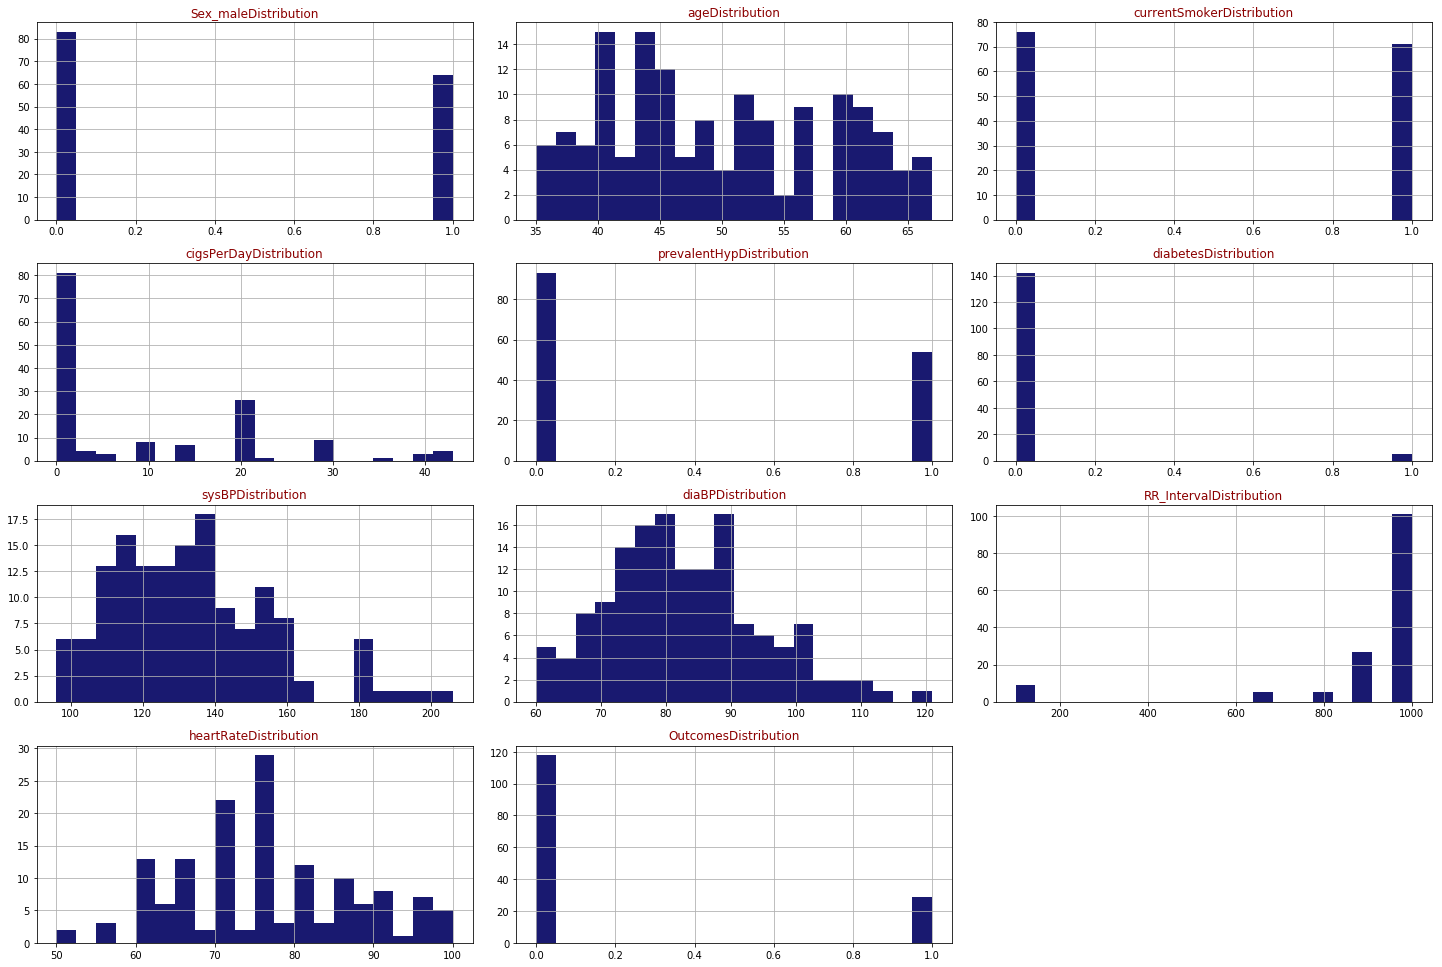

In [36]:
#Exploratory Analysis
def draw_histograms(dataframe,feature,row,cols):
    fig=plt.figure(figsize=(20,20))
    for i,feature in enumerate(feature):
        ax=fig.add_subplot(row,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+"Distribution",color='DarkRed')
    fig.tight_layout()
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)


In [37]:
heart_df.Outcomes.value_counts()

0    118
1     29
Name: Outcomes, dtype: int64

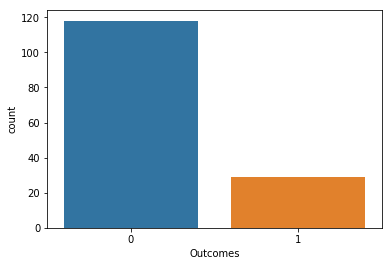

In [38]:
sn.countplot(x='Outcomes',data=heart_df)

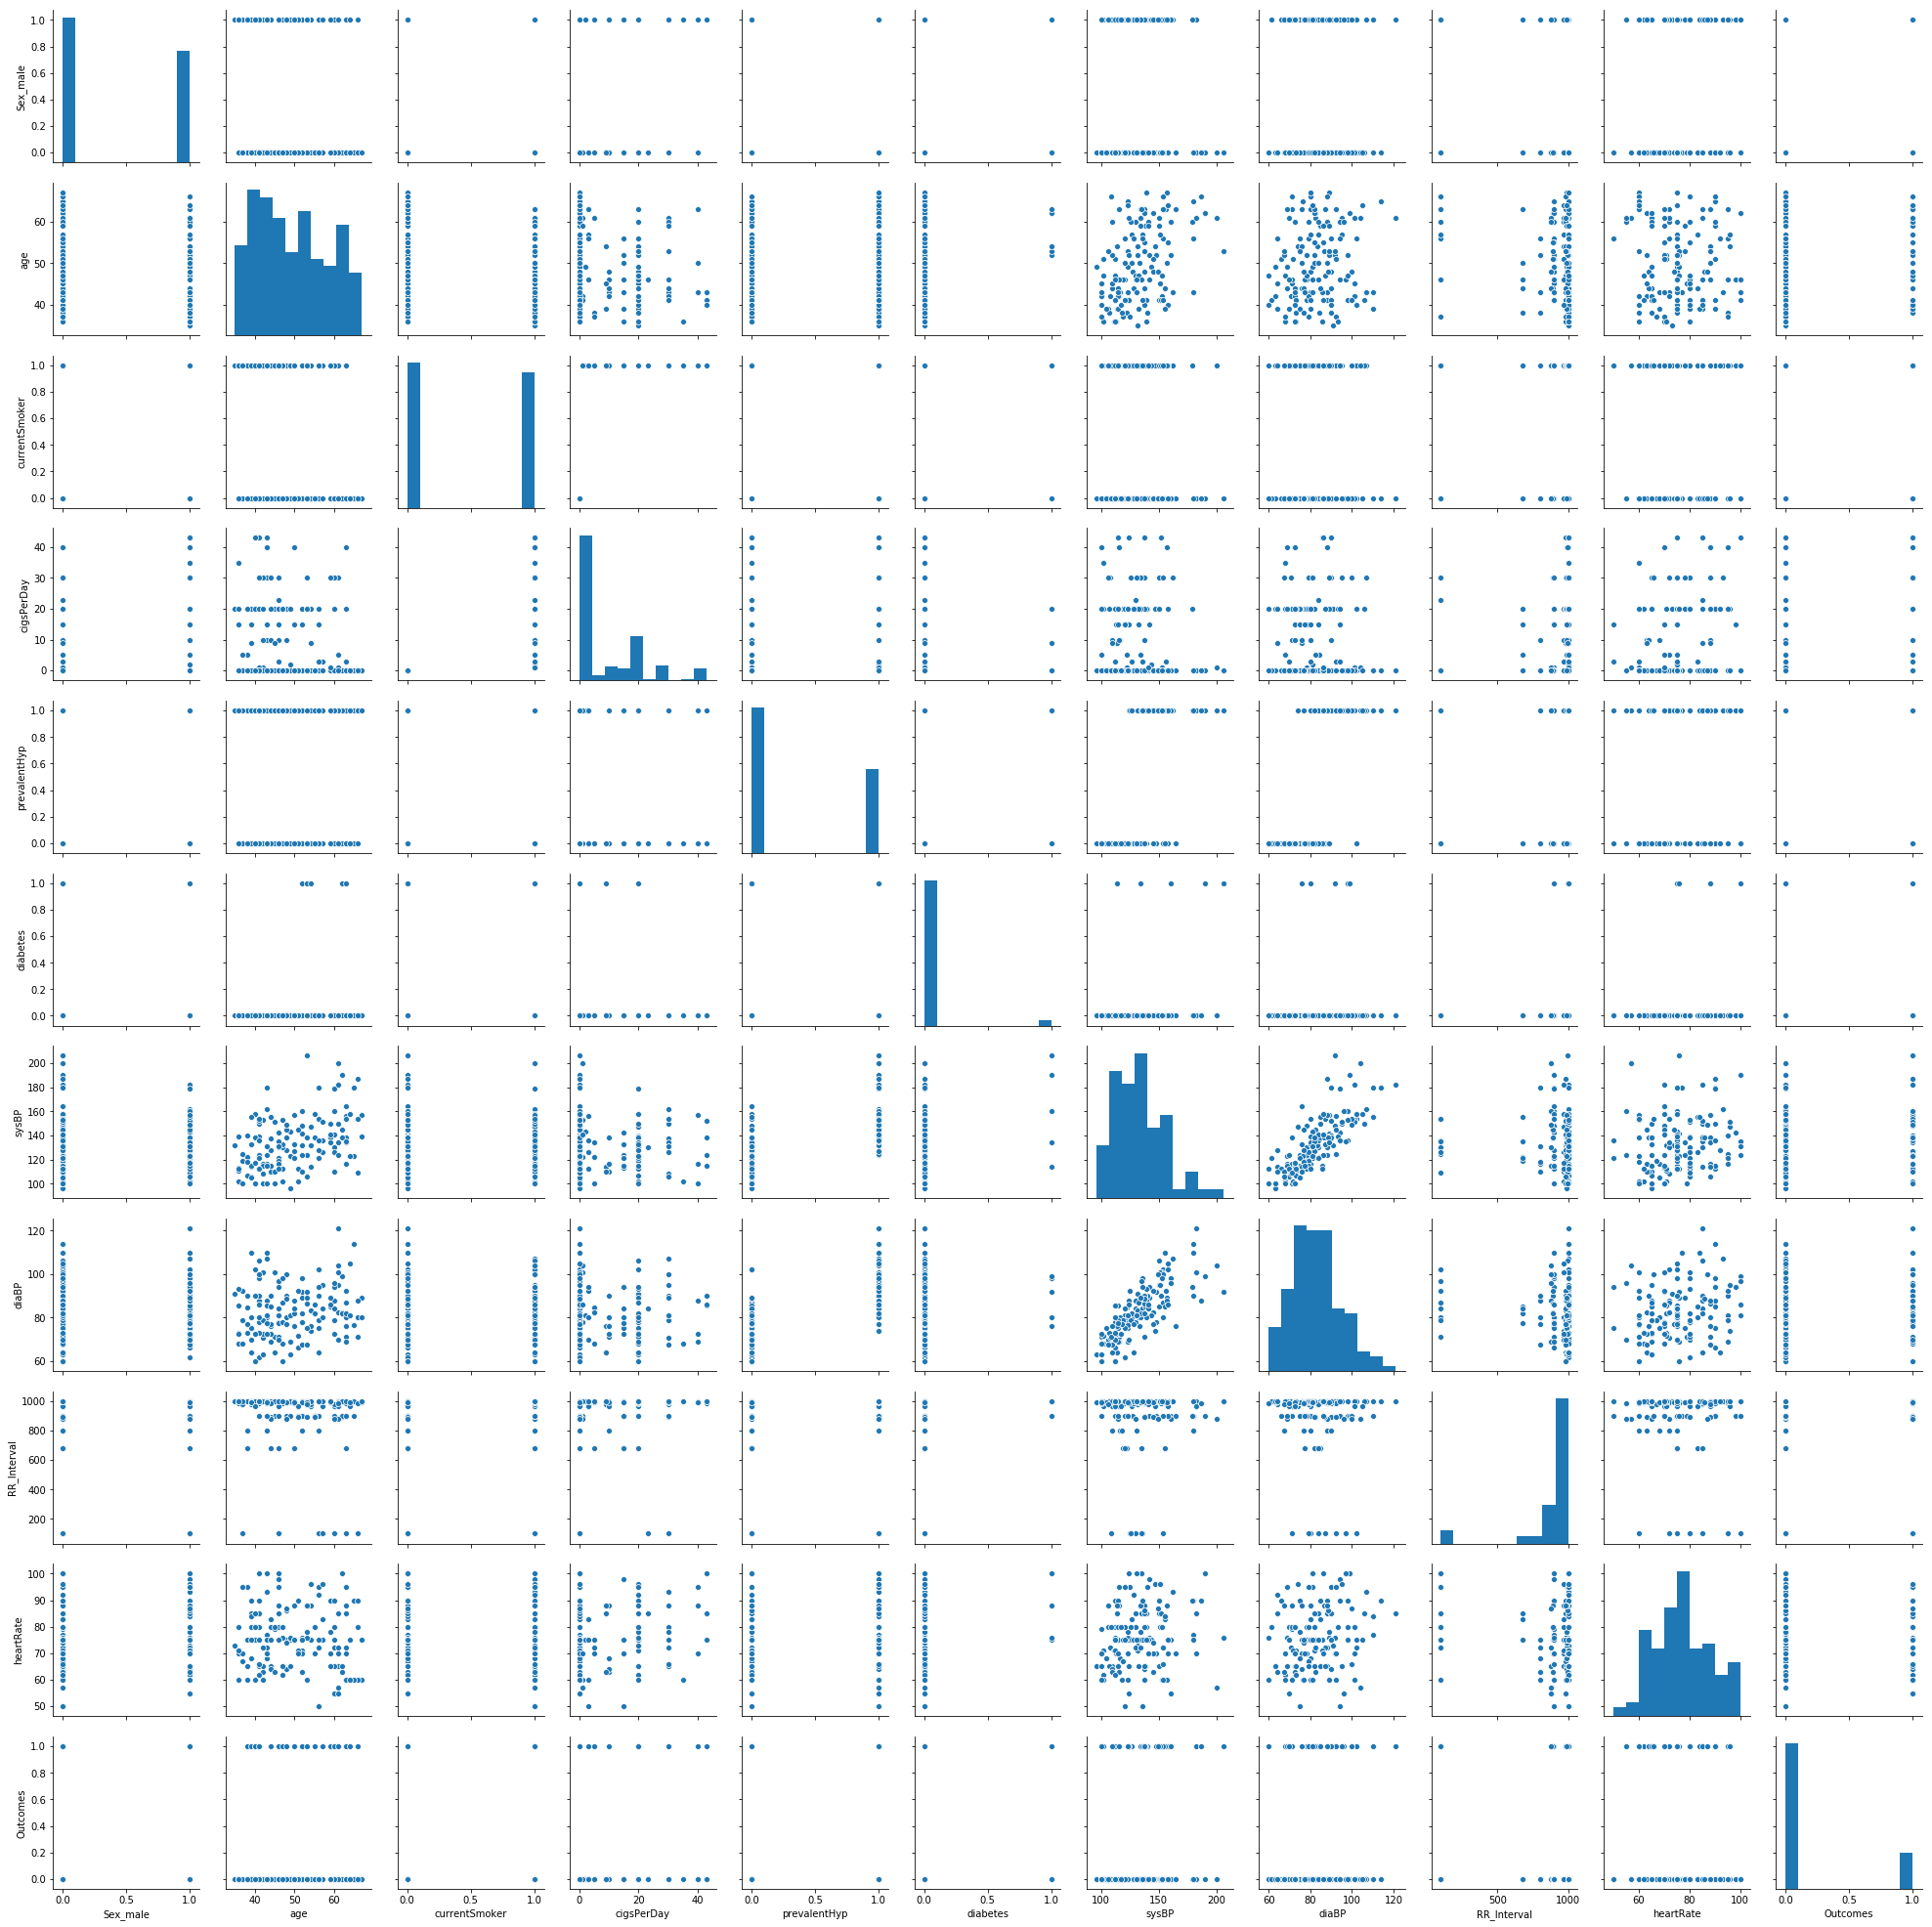

In [39]:
sn.pairplot(data=heart_df)

In [40]:
heart_df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,prevalentHyp,diabetes,sysBP,diaBP,RR_Interval,heartRate,Outcomes
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.435374,49.625850,0.482993,9.217687,0.367347,0.034014,133.462585,82.952381,902.632653,75.544218,0.197279
std,0.497501,8.889898,0.501419,12.385651,0.483730,0.181884,21.977346,11.779413,217.838104,11.243404,0.399305
min,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,96.000000,60.000000,100.000000,50.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,116.000000,75.000000,900.000000,67.500000,0.000000
50%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,132.000000,82.000000,989.000000,75.000000,0.000000
75%,1.000000,57.000000,1.000000,20.000000,1.000000,0.000000,147.500000,90.000000,1000.000000,84.500000,0.000000
max,1.000000,67.000000,1.000000,43.000000,1.000000,1.000000,206.000000,121.000000,1000.000000,100.000000,1.000000


In [41]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant=add_constant(heart_df)
heart_df_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,prevalentHyp,diabetes,sysBP,diaBP,RR_Interval,heartRate,Outcomes
0,1.0,1,39,0,0.0,0,0,106.0,70.0,1000,80,0
1,1.0,0,46,0,0.0,0,0,121.0,81.0,987,95,0
2,1.0,1,48,1,20.0,0,0,127.5,80.0,900,75,0
3,1.0,1,61,1,30.0,1,0,150.0,95.0,1000,65,1
4,1.0,0,46,1,23.0,0,0,130.0,84.0,100,85,0


In [44]:
st.chisqprob=lambda chisquare,df:st.chi2.sf(chisquare,df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.Outcomes,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.434272
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Outcomes   No. Observations:                  147
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                           10
Date:                Wed, 19 Dec 2018   Pseudo R-squ.:                  0.1255
Time:                        16:02:53   Log-Likelihood:                -63.838
converged:                       True   LL-Null:                       -73.001
                                        LLR p-value:                   0.04970
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.2020      3.193     -1.943      0.052     -12.459       0.055
Sex_male          1.0354      0.498      2.078      0.038       0.059       2.012
age               0.0677      0.031      2.189      0.029       0.007       0.128
currentSmoker    -0.7851      0.769     -1.021      0.307      -2.291       0.721
cigsPerDay        0.0317      0.030      1.050      0.294      -0.027       0.091
prevalentHyp      0.6290      0.655      0.961      0.337      -0.654       1.913
diabetes         -0.2234      1.266     -0.176      0.860      -2.705       2.258
sysBP             0.0008      0.020      0.039      0.969      -0.038       0.040
diaBP             0.0143      0.032      0.445      0.656      -0.049       0.077
RR_Interval       0.0010      0.001      0.916      0.360      -0.001       0.003
heartRate        -0.0214      0.022     -0.993      0.321      -0.064       0.021
=================================================================================
"""

In [54]:
#Feature Selection: Backward elemination (P-value approach)
def back_feature_elem(data_frame,dep_var,col_list):
    while len(col_list)>0:
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)
result=back_feature_elem(heart_df_constant,heart_df.Outcomes,cols)
result.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Outcomes   No. Observations:                  147
Model:                          Logit   Df Residuals:                      144
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Dec 2018   Pseudo R-squ.:                 0.08114
Time:                        16:22:02   Log-Likelihood:                -67.078
converged:                       True   LL-Null:                       -73.001
                                        LLR p-value:                  0.002676
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5709      1.430     -3.896      0.000      -8.374      -2.768
Sex_male       1.0242      0.450      2.277      0.023       0.143       1.906
age            0.0717      0.025      2.823      0.005       0.022       0.122
==============================================================================
"""

In [55]:
#Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues
params=np.exp(result.params)
conf=np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns=['CI 95%(2.55)','CI 95%(97.5%)','Odds ratio','Pvalue']
print((conf))


          CI 95%(2.55)  CI 95%(97.5%)  Odds ratio  Pvalue
const         0.000231       0.062787    0.003807   0.000
Sex_male      1.153189       6.724671    2.784747   0.023
age           1.022167       1.129261    1.074381   0.005


In [76]:
#Splitting data to train and test split
import sklearn
new_features=heart_df[['age','Sex_male','currentSmoker','cigsPerDay','prevalentHyp','diabetes','sysBP','diaBP','RR_Interval','heartRate','Outcomes']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [77]:
#from sklearn.linear_model import LogisticRegression
#logreg=LogisticRegression()
#logreg.fit(x_train,y_train)
#y_pred=logreg.predict(x_test)

In [78]:
#Model Evaluation
#Model accuracy
#sklearn.metrics.accuracy_score(y_test,y_pred)#Accuracy of the model is 0.73

'The confusion matrix shows 22+0 = 22 correct predictions and 6+2= 8 incorrect ones.\n\nTrue Positives: 0\n\nTrue Negatives: 22\n\nFalse Positives: 2 (Type I error)\n\nFalse Negatives: 6 ( Type II error)'

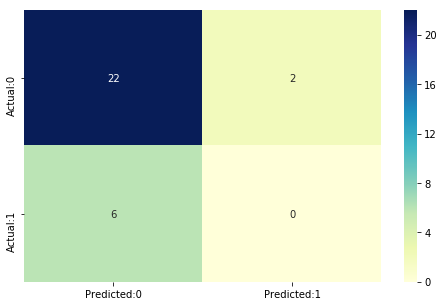

In [79]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu") 
'''The confusion matrix shows 22+0 = 22 correct predictions and 6+2= 8 incorrect ones.

True Positives: 0

True Negatives: 22

False Positives: 2 (Type I error)

False Negatives: 6 ( Type II error)'''

In [80]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TP/float(TN+FP)

In [81]:
from ipykernel import kernelapp as app
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7333333333333333 
 The Missclassification = 1-Accuracy =  0.2666666666666667 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.0 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9166666666666666 
 Positive Predictive value = TP/(TP+FP) =  0.0 
 Negative predictive Value = TN/(TN+FN) =  0.7857142857142857 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  0.0 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  inf


C:\Users\kvk\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


In [90]:
#Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.624847,0.375153
1,0.940332,0.059668
2,0.867100,0.132900
3,0.740861,0.259139
4,0.622104,0.377896


In [91]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.624847,0.375153
1,0.940332,0.059668
2,0.867100,0.132900
3,0.740861,0.259139
4,0.622104,0.377896


In [96]:
#Lower the threshold
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[ 8 16]
 [ 0  6]] 
 with 14 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.3333333333333333 



With 0.2 threshold the Confusion Matrix is  
 [[15  9]
 [ 3  3]] 
 with 18 correct predictions and 3 Type II errors( False Negatives) 

 Sensitivity:  0.5 Specificity:  0.625 



With 0.3 threshold the Confusion Matrix is  
 [[17  7]
 [ 5  1]] 
 with 18 correct predictions and 5 Type II errors( False Negatives) 

 Sensitivity:  0.16666666666666666 Specificity:  0.7083333333333334 



With 0.4 threshold the Confusion Matrix is  
 [[22  2]
 [ 6  0]] 
 with 22 correct predictions and 6 Type II errors( False Negatives) 

 Sensitivity:  0.0 Specificity:  0.9166666666666666 





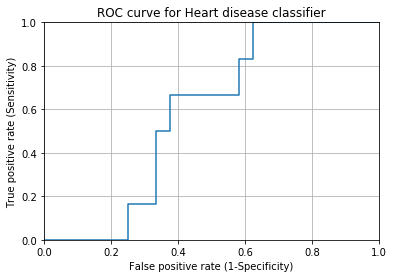

In [97]:
#ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [98]:
#Area Under The Curve (AUC)
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.5833333333333333